<a href="https://colab.research.google.com/github/Williamyan123/Cas-Score-Prediction/blob/master/Efficiency_CNN_Cas_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import theano
%matplotlib inline

import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dataframe = pd.read_csv("new (4).csv")
dataframe.head()


,Unnamed: 0,gRNA,TargetSite,MatchType,GuideScore
0,0,GGACAGGTGGGCGTGGCCCGAGC,CCTGTCCACCCGCACCGGGCTCG,Perfect Match,0.041854
1,1,AGGACAGGTGGGCGTGGCCCGAG,TCCTGTCCACCCGCACCGGGCTC,Perfect Match,-0.310824
2,2,CAGGACAGGTGGGCGTGGCCCGA,GTCCTGTCCACCCGCACCGGGCT,Perfect Match,-0.119489
3,3,TGCAGGACAGGTGGGCGTGGCCC,ACGTCCTGTCCACCCGCACCGGG,Perfect Match,-0.404897
4,4,CTGCAGGACAGGTGGGCGTGGCC,GACGTCCTGTCCACCCGCACCGG,Perfect Match,-0.042202


In [ ]:
guide= dataframe["gRNA"]
guide=guide[pd.notnull].to_numpy()
target= dataframe["TargetSite"]
target=target[pd.notnull].to_numpy()

y=dataframe["GuideScore"]
y=y[pd.notnull].astype(float)

print(guide)
print(target)
print(y)

['GGACAGGTGGGCGTGGCCCGAGC' 'AGGACAGGTGGGCGTGGCCCGAG'
 'CAGGACAGGTGGGCGTGGCCCGA' ... 'AGATTCTCATGTGACTTGAGGTT'
 'TAAGATTCTCATGTGACTTGAGG' 'ACTAAGATTCTCATGTGACTTGA']
['CCTGTCCACCCGCACCGGGCTCG' 'TCCTGTCCACCCGCACCGGGCTC'
 'GTCCTGTCCACCCGCACCGGGCT' ... 'TCTAAGAGTACACTGAACTCCAA'
 'ATTCTAAGAGTACACTGAACTCC' 'TGATTCTAAGAGTACACTGAACT']
0       0.041854
1      -0.310824
2      -0.119489
3      -0.404897
4      -0.042202
          ...   
1495   -0.230644
1496   -0.514119
1497   -1.193484
1498   -0.570514
1499   -0.490011
Name: GuideScore, Length: 1500, dtype: float64


In [ ]:
def spl(word): 
    return [char for char in word]  
def transform(basepairs):
  for i in range(0,23):
  
    if basepairs[i] == "A":
      basepairs.remove(basepairs[i])
      basepairs.insert(i,[1,0,0,0])
    if basepairs[i] == "T":
      basepairs.remove(basepairs[i])
      basepairs.insert(i,[0,1,0,0])
    if basepairs[i] == "G":
      basepairs.remove(basepairs[i])
      basepairs.insert(i,[0,0,1,0])
    if basepairs[i] == "C":
      basepairs.remove(basepairs[i])
      basepairs.insert(i,[0,0,0,1])
  return basepairs
  '''
  if len(basepairs) < 24:
    basepairs.append([p[x],p[x],p[x],p[x]])
    basepairs.append([p[x],p[x],p[x],p[x]])
    basepairs.append([p[x],p[x],p[x],p[x]])
  else:
    basepairs==basepairs
  return basepairs
  '''

In [ ]:
guide0=[]
target0=[]
for i in range(len(guide)):
  guide0.append(spl(guide[i]))
  target0.append(spl(target[i]))
print(guide0)
print(target0)

NameError: ignored

In [ ]:
transform(guide0[0])

[[0, 0, 1, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1]]

In [ ]:
x_encoded=[]
for i in range(len(guide)):
  TargetSite=transform(target0[i])
  TargetSite=np.expand_dims(np.array(TargetSite),axis=1)
  GuideSequence=transform(guide0[i])
  GuideSequence=np.array(np.expand_dims(GuideSequence,axis=1))
  final_match=np.concatenate((GuideSequence, TargetSite),axis=1)
  final_match=final_match.reshape(23,8)
  x_encoded.append(final_match)
print(x_encoded[1])


'''
x_final=np.array(x_encoded)



print(x_final[0]))
'''



[[1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 1]
 [1 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 1 0]
 [1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 1]
 [0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 1]
 [0 0 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 1]
 [0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 1]
 [0 0 0 1 0 0 1 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 1 0 0 1 0]
 [0 0 1 0 0 0 0 1]
 [1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1]]


'\nx_final=np.array(x_encoded)\n\n\n\nprint(x_final[0]))\n'

In [ ]:
TargetSite=transform(TargetSite)
  TargetSite=np.expand_dims(np.array(TargetSite),axis=1)
  GuideSequence=transform(GuideSequence)
  GuideSequence=np.array(np.expand_dims(GuideSequence,axis=1))
  final_match=np.concatenate((GuideSequence, TargetSite),axis=1)


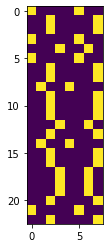

In [ ]:

plt.imshow(x_encoded[1], interpolation='nearest')

In [ ]:
x_encoded=np.expand_dims(x_encoded,axis=3)
x_encoded.shape

(1500, 23, 8, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_encoded,y,test_size=0.25,random_state = 0)

y_test=y_test.to_numpy()
print(type(y_test))


<class 'numpy.ndarray'>


In [ ]:
import tensorflow as tf
opt=tf.keras.optimizers.RMSprop(0.001)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import LeakyReLU
from keras.initializers import Constant
import sklearn.metrics as metrics
dr=0.5
alp = 0.1
fil=8
model = Sequential()
image_shape = (23, 8,1)
model.add(Conv2D(filters=fil, kernel_size=(3,3),input_shape=image_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(3,1)))
model.add(Conv2D(filters=fil, kernel_size=(3,3),input_shape=image_shape, activation="relu"))
model.add(MaxPooling2D(pool_size=(1,2)))
#model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation="relu"))







model.add(Flatten())


model.add(Dense(64))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=alp))
model.add(Dropout(dr))

model.add(Dense(64))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=alp))
model.add(Dropout(dr))



model.add(Dense(1))

model.compile(loss='mse',
              optimizer=opt,
              metrics='mse')

In [ ]:
model.summary()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience = 3)

In [ ]:
result = model.fit(x_train, 
                   y_train, 
                   epochs=60, 
                   batch_size = 256,
                   validation_split=0.2,
                   callbacks =[early_stop])




Epoch 1/60
4/4 [==============================] - 0s 53ms/step - loss: 0.8881 - mse: 0.8881 - val_loss: 0.8031 - val_mse: 0.8031
Epoch 2/60
4/4 [==============================] - 0s 26ms/step - loss: 0.8034 - mse: 0.8034 - val_loss: 0.8054 - val_mse: 0.8054
Epoch 3/60
4/4 [==============================] - 0s 25ms/step - loss: 0.7623 - mse: 0.7623 - val_loss: 0.8157 - val_mse: 0.8157
Epoch 4/60
4/4 [==============================] - 0s 27ms/step - loss: 0.7626 - mse: 0.7626 - val_loss: 0.8020 - val_mse: 0.8020
Epoch 5/60
4/4 [==============================] - 0s 27ms/step - loss: 0.7527 - mse: 0.7527 - val_loss: 0.8250 - val_mse: 0.8250
Epoch 6/60
4/4 [==============================] - 0s 25ms/step - loss: 0.7358 - mse: 0.7358 - val_loss: 0.7955 - val_mse: 0.7955
Epoch 7/60
4/4 [==============================] - 0s 27ms/step - loss: 0.7524 - mse: 0.7524 - val_loss: 0.7978 - val_mse: 0.7978
Epoch 8/60
4/4 [==============================] - 0s 24ms/step - loss: 0.7412 - mse: 0.7412 - val

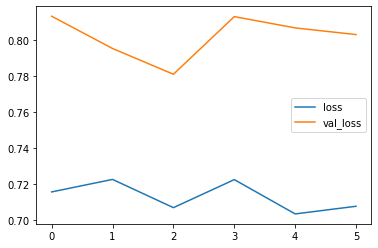

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
losses[['mse','val_mse']].plot()

In [ ]:
model.predict(x_test[1:3])

In [ ]:
transform(spl("TCCAG"))

IndexError: ignored

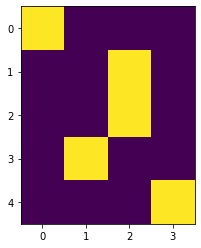

In [ ]:
  def transforms(basepairs):
    for i in range(0,5):
  
      if basepairs[i] == "A":
        basepairs.remove(basepairs[i])
        basepairs.insert(i,[1,0,0,0])
      if basepairs[i] == "T":
        basepairs.remove(basepairs[i])
        basepairs.insert(i,[0,1,0,0])
      if basepairs[i] == "G":
        basepairs.remove(basepairs[i])
        basepairs.insert(i,[0,0,1,0])
      if basepairs[i] == "C":
        basepairs.remove(basepairs[i])
        basepairs.insert(i,[0,0,0,1])
    return basepairs
  sample=transforms(spl("AGGTC"))
  plt.imshow(sample, interpolation='nearest')


In [ ]:
def plot_filters (layer, x,y):
  filters = model.layers[layer].get_weights()[0][:,:,0,:]
  fig=plt.figure()
  for i in range(len(filters)):
    ax=fig.add_subplot(y,x,i+1)
    ax.matshow(filter[j][0], cmap= matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
  plt.tight_layout
  return plt

plot_filters(model.layers[0],2,1)

In [ ]:
filters, biases = model.layers[2].get_weights()
filters[0][0][0]

In [ ]:
model.layers[0]

In [ ]:

for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)


In [ ]:
pred1=model.predict(x_test)
pred1.shape

In [ ]:
print(type(y_test))


In [ ]:
plt.figure(figsize=(100,30))
plt.scatter(range(0,217),pred1, color="red")
plt.plot(range(0,217),y_test, color="blue")



In [ ]:
d=0
sum_mean_sq=0
for i in range(0,len(pred1)):
  dif=pred1[i]-y_test[i]
  d=d+dif**2
  

mse_pred1=d/len(pred1)
print("mse of pred1: {}".format(mse_pred1))

for i in range (0,len(y_test)):
  mean=y_test[i]/len(y_test)
  sum_mean_sq=sum_mean_sq+(y_test[i]-mean)**2
  r_squared=1-(d/sum_mean_sq)
print("R squared of pred1: {}".format(r_squared))
